[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deepureddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-179-058ac0d7dfb6>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training['cleaned_text'] = df_training['Report_MG'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-179-058ac0d7dfb6>:77: SettingWithCopyWarning: 
A value

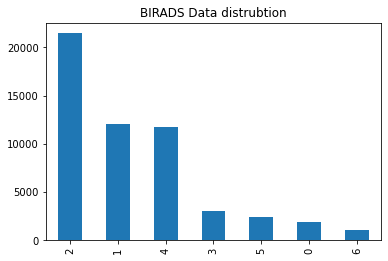

In [179]:
import torch
import re
import pandas as pd
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification
df_rad =pd.read_csv('/Users/deepureddy/Desktop/REDI/radiology_reports_birads_score_STUDENTS_PRO.csv')
df_rad = df_rad.apply(lambda x: x.astype(str).str.lower())
df_rad["BIRADS"] = df_rad["BIRADS"].replace("i",1)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("ii",2)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("iii",3)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("iv",4)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("v",5)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("vi",6)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("vii",7)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("viii",8)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("ix",9)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("x",10)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("een",1)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("twee",2)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("drie",3)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("vier",4)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("vijf",5)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("zes",6)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("zeven",7)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("acht",8)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("negen",9)
df_rad["BIRADS"] = df_rad["BIRADS"].replace("tien",10)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('iva', 4)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('ivb', 4)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('ivc', 4)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('ivd', 4)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('4a', 4)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('4b', 4)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('4c', 4)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('4d', 4)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('0', 0)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('1', 1)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('2', 2)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('3', 3)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('4', 4)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('5', 5)
df_rad['BIRADS'] = df_rad['BIRADS'].replace('6', 6)
df_rad_1 = df_rad
import pandas as pd
import numpy as np
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('dutch')
stop.remove('geen')
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","\n",'ii','iii',"\d","Verslag:", "medische", "gegevens"]
for char in spec_chars:
    df_rad_1['Report_MG'] = df_rad_1['Report_MG'].str.replace(char, ' ')
    df_rad_1['Report_US'] = df_rad_1['Report_US'].str.replace(char, ' ')
    df_rad_1['Report_MRI'] = df_rad_1['Report_MRI'].str.replace(char, ' ')
df_rad_1['Report_MG'] = df_rad_1['Report_MG'].str.split("Conclusie:",expand=True)
df_ploted = df_rad_1['BIRADS'].value_counts()
df_ploted.plot.bar(x="test", y="gest", rot=100, title="BIRADS Data distrubtion")
df_rad_1.drop(df_rad_1.index[df_rad_1['BIRADS'] == 'nan'], inplace = True)
df_rad_1.drop(df_rad_1.index[df_rad_1['BIRADS'] == '7'], inplace = True)
df_rad_1.drop(df_rad_1.index[df_rad_1['BIRADS'] == '8'], inplace = True)
df_rad_1.drop(df_rad_1.index[df_rad_1['BIRADS'] == '9'], inplace = True)
df_ploted = df_rad_1['BIRADS'].value_counts()
df_ploted.plot.bar(x="test", y="gest", rot=100, title="BIRADS Data distrubtion")
df_training = df_rad_1[['Id','Report_MG','BIRADS']]
df_training['cleaned_text'] = df_training['Report_MG'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_training.drop(df_training.index[df_training['Report_MG'] == 'nan'], inplace = True)
new_ploted = df_training['BIRADS'].value_counts()
new_ploted.plot.bar(title="BIRADS Data distrubtion")
df_training['cleaned_text'] = df_training['Report_MG'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_training.head()
df_main_data = df_training[['cleaned_text','BIRADS']]

In [180]:
df_main_data

,cleaned_text,BIRADS
1,controle mammografie afwijkingen verslag verge...,2
2,klinische followup kadermammacarcinoom rechts ...,2
3,controle mammografie x mammografie rechts verg...,2
4,mammacarcinoom rechts follow up verslag ter ve...,1
6,indicatie fu kader belaste fa verslag t o v ap...,1
...,...,...
54395,klinische jarige vrouw hengelo komt via bevolk...,4
54397,klinische jarige vrouw hengelo voelt sinds aan...,1
54398,klinische jarige vrouw borne voelt sinds maand...,2
54400,klinische jarige vrouw almelo pijn r borst sin...,2


In [181]:
import numpy as np
seq_len = 512
num_samples = len(df_main_data)
Xids =np.zeros((num_samples,seq_len))
Xmask =np.zeros((num_samples,seq_len))
Xids.shape

(35030, 512)

In [182]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('GroNLP/bert-base-dutch-cased')
for i,cleaned_text in enumerate(df_main_data['cleaned_text']):
    tokens = tokenizer.encode_plus(cleaned_text, max_length=seq_len, truncation = True,
                                 padding ='max_length',add_special_tokens = True,return_tensors = 'tf')
    Xids[i, :] = tokens['input_ids']
    Xmask[i, :] = tokens['attention_mask']

In [183]:
Xids

array([[1.0000e+00, 1.0367e+04, 1.5328e+04, ..., 3.0000e+00, 3.0000e+00,
        3.0000e+00],
       [1.0000e+00, 1.4360e+04, 1.1700e+02, ..., 3.0000e+00, 3.0000e+00,
        3.0000e+00],
       [1.0000e+00, 1.0367e+04, 1.5328e+04, ..., 3.0000e+00, 3.0000e+00,
        3.0000e+00],
       ...,
       [1.0000e+00, 1.4360e+04, 1.1700e+02, ..., 3.0000e+00, 3.0000e+00,
        3.0000e+00],
       [1.0000e+00, 1.4360e+04, 1.1700e+02, ..., 3.0000e+00, 3.0000e+00,
        3.0000e+00],
       [1.0000e+00, 1.4360e+04, 1.1700e+02, ..., 3.0000e+00, 3.0000e+00,
        3.0000e+00]])

In [184]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [185]:
df_main_data

,cleaned_text,BIRADS
1,controle mammografie afwijkingen verslag verge...,2
2,klinische followup kadermammacarcinoom rechts ...,2
3,controle mammografie x mammografie rechts verg...,2
4,mammacarcinoom rechts follow up verslag ter ve...,1
6,indicatie fu kader belaste fa verslag t o v ap...,1
...,...,...
54395,klinische jarige vrouw hengelo komt via bevolk...,4
54397,klinische jarige vrouw hengelo voelt sinds aan...,1
54398,klinische jarige vrouw borne voelt sinds maand...,2
54400,klinische jarige vrouw almelo pijn r borst sin...,2


In [190]:
arr = pd.to_numeric(df_main_data['BIRADS'].values)
arr

array([2, 2, 2, ..., 2, 2, 2])

In [191]:
labels = np.zeros((num_samples, arr.max()+1))
labels.shape

(35030, 7)

In [192]:
#df_main_data['BIRADS'] = df_main_data['BIRADS'].astype(int)
df_main_data['BIRADS'] = pd.to_numeric(df_main_data['BIRADS'])

df_main_data.dtypes

<ipython-input-192-018173f2576b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_data['BIRADS'] = pd.to_numeric(df_main_data['BIRADS'])


cleaned_text    object
BIRADS           int64
dtype: object

In [193]:
labels[np.arange(num_samples), arr] = 1

In [194]:
labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [195]:
import tensorflow as tf

In [196]:
dataset = tf.data.Dataset.from_tensor_slices((Xids,Xmask,labels))
dataset.take(1)

<TakeDataset shapes: ((512,), (512,), (7,)), types: (tf.float64, tf.float64, tf.float64)>

In [197]:
labels[0, :].shape

(7,)

In [198]:
def map_func(input_ids, masks,labels):
    return {'input_ids' :input_ids, 'attention_mask' : masks}, labels

In [199]:
dataset = dataset.map(map_func)

In [200]:
dataset.take(1)

<TakeDataset shapes: ({input_ids: (512,), attention_mask: (512,)}, (7,)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [201]:
batch_size = 16
dataset = dataset.shuffle(10000).batch(batch_size, drop_remainder = True)
dataset.take(1)

<TakeDataset shapes: ({input_ids: (16, 512), attention_mask: (16, 512)}, (16, 7)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [202]:
split = 0.8
size = int((num_samples/batch_size)*split)

In [203]:
int((num_samples/batch_size)*split)

1751

In [204]:
train_ds = dataset.take(size)
val_ds = dataset.skip(size)
del dataset

In [205]:
from transformers import TFAutoModel
bert = TFAutoModel.from_pretrained('GroNLP/bert-base-dutch-cased')
bert.summary()

Some layers from the model checkpoint at GroNLP/bert-base-dutch-cased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at GroNLP/bert-base-dutch-cased and are newly initialized: ['bert/pooler/dense/kernel:0', 'bert/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109137408 
Total params: 109,137,408
Trainable params: 109,137,408
Non-trainable params: 0
_________________________________________________________________


In [207]:
input_ids = tf.keras.layers.Input(shape=(seq_len,), name = 'input_ids',dtype='int32')
mask = tf.keras.layers.Input(shape=(seq_len,), name = 'attention_mask',dtype='int32')
embeddings = bert.bert(input_ids,mask)[1]
x = tf.keras.layers.Dense(1024, activation = 'relu')(embeddings)
y = tf.keras.layers.Dense(arr.max()+1, activation = 'softmax',name = 'outputs')(x)

In [208]:
model = tf.keras.Model(inputs =[input_ids,mask], outputs = y)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 109137408   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 1024)         787456      bert[1][1]                 

In [209]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1, decay = 0.1)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [210]:
model.compile(optimizer=optimizer,loss =loss, metrics = [acc])

In [212]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs =1 
)

1751/1751 [==============================] - 148755s 85s/step - loss: 1.2862 - accuracy: 0.5128 - val_loss: 1.1801 - val_accuracy: 0.5889


In [214]:
model.save('sentiment_model')

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: sentiment_model/assets


INFO:tensorflow:Assets written to: sentiment_model/assets
